In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

### EDA

In [40]:
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [42]:
df.landmass.value_counts()

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64

In [43]:
df_36 = df[df["landmass"].isin([3,6])]

In [44]:
df_36.groupby('landmass')[var].mean()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,crosses,saltires,quarters,sunstars,triangle,animate
landmass,,,,,,,,,,,,,,,,
3,0.828571,0.2,0.514286,0.428571,0.771429,0.171429,0.057143,0.628571,1.285714,0.028571,0.285714,0.028571,0.028571,0.142857,0.028571,0.114286
6,0.800000,0.2,0.800000,0.600000,0.950000,0.150000,0.150000,0.000000,0.400000,0.150000,0.400000,0.300000,0.400000,3.300000,0.250000,0.300000


In [45]:
labels = df_36["landmass"]

In [46]:
df_36[var].dtypes

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object

In [47]:
# mianhue is not numeric
df_36.mainhue.unique()

array(['red', 'blue', 'gold', 'white', 'black', 'green'], dtype=object)

In [51]:
data = pd.get_dummies(df_36[var])
data.head()

,red,green,blue,gold,white,black,orange,bars,stripes,circles,...,quarters,sunstars,triangle,animate,mainhue_black,mainhue_blue,mainhue_gold,mainhue_green,mainhue_red,mainhue_white
1,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,1,1,1,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
4,1,0,1,1,0,0,0,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10,1,0,1,0,1,0,0,0,0,0,...,1,6,0,0,0,1,0,0,0,0
11,1,0,0,0,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0


### Model

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.4, random_state = 1)

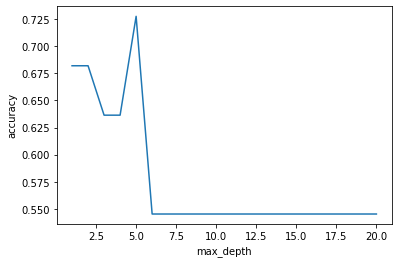

In [58]:
acc_depth = []
for i in range(1,21):
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    
    acc_depth.append(dt.score(x_test, y_test))

depths = range(1,21)  
plt.plot(range(1,21), acc_depth)  
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [59]:
# Largest accuracy
np.max(acc_depth)

0.7272727272727273

In [60]:
best_depth = depths[np.argmax(acc_depth)]
best_depth

5

In [65]:
dt = DecisionTreeClassifier(random_state = 1, max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

#### Plot the tree

[Text(0.5454545454545454, 0.9166666666666666, 'mainhue_blue <= 0.5\ngini = 0.422\nsamples = 33\nvalue = [23, 10]\nclass = Europe'),
 Text(0.36363636363636365, 0.75, 'sunstars <= 3.0\ngini = 0.219\nsamples = 24\nvalue = [21, 3]\nclass = Europe'),
 Text(0.2727272727272727, 0.5833333333333334, 'circles <= 0.5\ngini = 0.159\nsamples = 23\nvalue = [21, 2]\nclass = Europe'),
 Text(0.18181818181818182, 0.4166666666666667, 'stripes <= 1.5\ngini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = Europe'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Europe'),
 Text(0.2727272727272727, 0.25, 'stripes <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Europe'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Europe'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Europe'),
 Text(0.36363636363636365, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue =

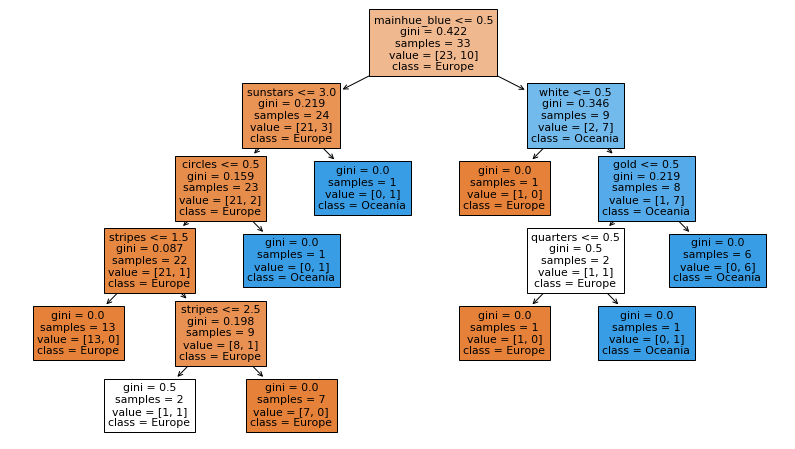

In [66]:
plt.figure(figsize=(14,8))
tree.plot_tree(dt, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'],
                filled=True)

#### Tune ccp_alpha

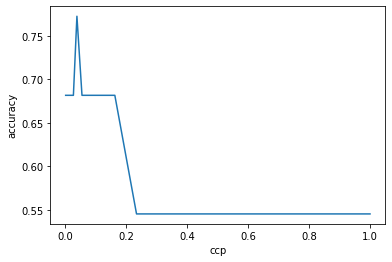

In [67]:
acc_prune = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dt = DecisionTreeClassifier(random_state = 1, max_depth = 5, ccp_alpha = i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    
    acc_prune.append(dt.score(x_test, y_test))
 
plt.plot(ccp, acc_prune)  
plt.xlabel('ccp')
plt.ylabel('accuracy')
plt.show()

In [68]:
np.max(acc_prune), ccp[np.argmax(acc_prune)]

(0.7727272727272727, 0.0379269019073225)

[Text(0.5555555555555556, 0.875, 'mainhue_blue <= 0.5\ngini = 0.422\nsamples = 33\nvalue = [23, 10]\nclass = Europe'),
 Text(0.3333333333333333, 0.625, 'sunstars <= 3.0\ngini = 0.219\nsamples = 24\nvalue = [21, 3]\nclass = Europe'),
 Text(0.2222222222222222, 0.375, 'circles <= 0.5\ngini = 0.159\nsamples = 23\nvalue = [21, 2]\nclass = Europe'),
 Text(0.1111111111111111, 0.125, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = Europe'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Oceania'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Oceania'),
 Text(0.7777777777777778, 0.625, 'white <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = Oceania'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Europe'),
 Text(0.8888888888888888, 0.375, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = Oceania')]

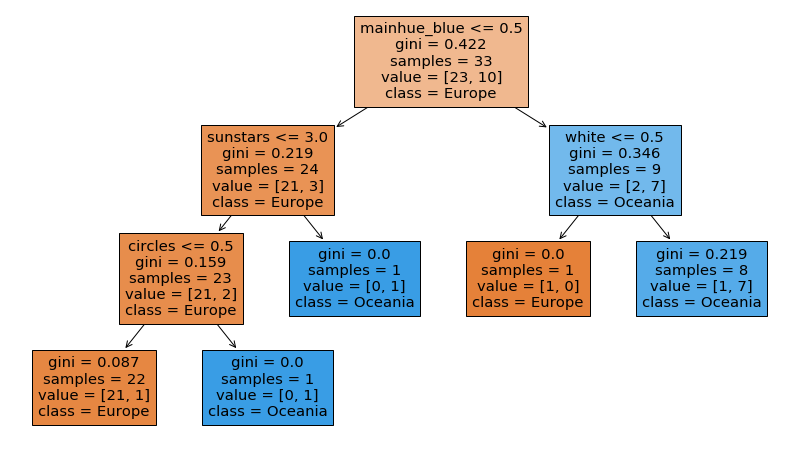

In [70]:
ccp_best = ccp[np.argmax(acc_prune)]
dt = DecisionTreeClassifier(random_state = 1, max_depth = 5, ccp_alpha = ccp_best)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
               
plt.figure(figsize=(14,8))
tree.plot_tree(dt, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'],
                filled=True)